In [2]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Select the features from the DataFrame
X = df[df.columns[0:12]]

# Select the label from the DataFrame
y = df['DEATH_EVENT']

# Display the features
X


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [6]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

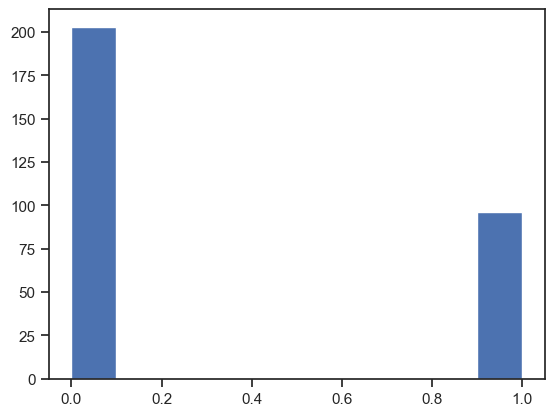

In [7]:
plt.hist(df['DEATH_EVENT'])
plt.show()

In [8]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].apply(lambda x: 1 if x =='Dead' else (0 if x =='not Dead' else None))
print (df.shape)

(299, 13)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
#scaler.data_max_
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 0.81433868, -0.88674956, -0.01153283, ...,  0.74037028,
         1.48841682,  1.58816929],
       [-0.0490202 ,  1.12771412, -0.00552695, ..., -1.35067551,
        -0.67185481, -1.21951146],
       [ 0.38265924, -0.88674956, -0.01153283, ...,  0.74037028,
         1.48841682,  1.0965017 ],
       ...,
       [ 2.109377  ,  1.12771412, -0.49200363, ..., -1.35067551,
        -0.67185481, -0.43025558],
       [-0.0490202 , -0.88674956, -0.01153283, ...,  0.74037028,
         1.48841682, -1.12894111],
       [ 0.81433868,  1.12771412, -0.42293595, ...,  0.74037028,
         1.48841682,  0.24255271]])

In [11]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range
param_grid = [
    #{'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [0.1,1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['linear','rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    #{'hidden_layer_sizes':[(10,),(15,10)], 'max_iter':[200], 'activation': ['relu','tanh','logistic'], 'solver': ['adam']}
 ]

# create grid search object
classifier = GridSearchCV(SVC(), param_grid, scoring='recall_micro', cv=5, refit = True, verbose = 3)

# fitting the model for grid search
classifier.fit(X_train, y_train)

# print best parameter after tuning
print('parameter terbaik:',classifier.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.786 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.786 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.854 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.786 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.905 total time=   0.0s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.810 total time=   0.0s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.854 total time=   0.0s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.786 total time=   0.0s
[CV 2/5] END ..............C=100, kernel=linear;,

In [12]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



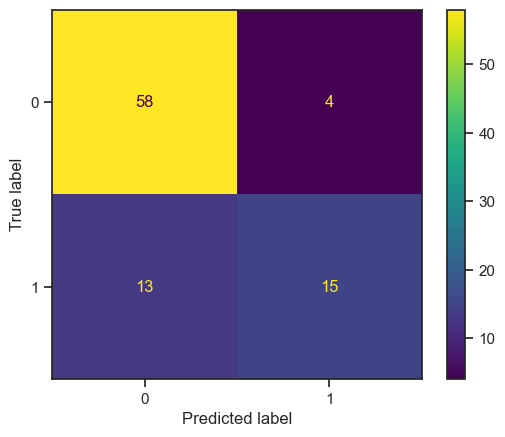

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

In [14]:
# Importing the module for LimeTabularExplainer
from lime import lime_tabular

name_features = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time']
name_classes=['not Dead', 'Dead']
# features2 = df.drop('is_canceled', axis=1)
# name_features = features2.columns

# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
												feature_names=name_features,
												class_names=name_classes,
												verbose=True,
												mode='classification')

In [15]:
# Index corresponding to the test vector
i = 2
# Number denoting the top features
k = 12

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k

#test = clf.predict_proba(best_X_test)
predict_fn = lambda X_test: classifier.predict_proba((X_test))

exp_lime = explainer_lime.explain_instance(X_test[i], predict_fn, num_features=k)

# Finally visualizing the explanations
exp_lime.show_in_notebook()

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'